# Execute the code below

In [1]:
import pandas as pd
import seaborn as sns

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_zoom = df_music.loc[df_music.genre.isin(['Country', 'Classical']), ['genre', 'duration_ms', 'speechiness']].reset_index(drop = True)
df_zoom

,genre,duration_ms,speechiness
0,Country,200013,0.0444
1,Country,208187,0.0569
2,Country,123360,0.0960
3,Country,238600,0.0368
4,Country,243000,0.0330
...,...,...,...
17915,Country,179147,0.0322
17916,Country,230400,0.0832
17917,Country,216093,0.0268
17918,Country,179947,0.0909


In [2]:
df_zoom.dtypes


genre           object
duration_ms      int64
speechiness    float64
dtype: object

# Standardization and classification

You now have a dataset with Country and Classical musics, and 2 numerical features : duration and speechiness.
Our goal will be to predict genre from numerical features.

## Draw a scatterplot from df_zoom with
- 'duration_ms' on X axis
- 'speechiness' on Y axis
- 'genre' in hue

<Axes: xlabel='duration_ms', ylabel='speechiness'>

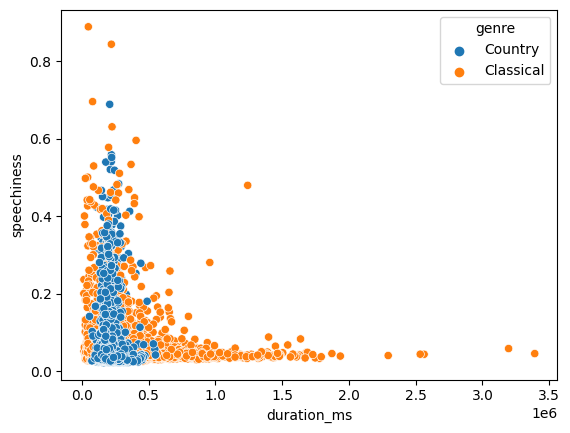

In [3]:
# Your code here :

sns.scatterplot(data= df_zoom, x = 'duration_ms', y= 'speechiness', hue = 'genre')

## Classification
From df_zoom :
- define X (`duration_ms` and `speechiness`)
- define y (`genre`)
- split your datas into train and test datasets, and `random_state = 2`
- perform 3 classification algorithms (Logistic Regression, KNN and Decision Tree)
- score your 3 models with accuracy score on the train dataset and on the test dataset


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [28]:
# Your code here :

columns = df_zoom.select_dtypes(['int', 'float']).columns
X = df_zoom[columns]

y = df_zoom['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)
# Logistic Regression

modelLR = LogisticRegression().fit(X,y)
y_pred_LR = modelLR.predict(X_test)
accuracy_LR = accuracy_score(y_test, y_pred_LR)


modelKNN = KNeighborsClassifier().fit(X, y)
y_pred_KNN = modelKNN.predict(X_test)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)

modelDTC = DecisionTreeClassifier().fit(X, y)
y_pred_DTC = modelDTC.predict(X_test)
accuracy_DTC = accuracy_score(y_test, y_pred_DTC)

print("Logistic Regression Accuracy:", accuracy_LR)
print("K-Nearest Neighbors Accuracy:", accuracy_KNN)
print("Decision Tree Classifier Accuracy:", accuracy_DTC)



print(modelLR.score(X_train,y_train))
print(modelLR.score(X_test,y_test))
print('\n -------------------------------')
print(modelKNN.score(X_train,y_train))
print(modelKNN.score(X_test,y_test))
print('\n -------------------------------')
print(modelDTC.score(X_train,y_train))
print(modelDTC.score(X_test,y_test))

Logistic Regression Accuracy: 0.5098214285714285
K-Nearest Neighbors Accuracy: 0.7982142857142858
Decision Tree Classifier Accuracy: 0.9997767857142857
0.51875
0.5098214285714285

 -------------------------------
0.8002232142857143
0.7982142857142858

 -------------------------------
0.9994791666666667
0.9997767857142857


In [30]:
# Your code here :

columns = df_zoom.select_dtypes(['int', 'float']).columns
X = df_zoom[['duration_ms', 'speechiness']]
y = df_zoom['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)
# Logistic Regression

modelLR = LogisticRegression().fit(X,y)
modelKNN = KNeighborsClassifier().fit(X, y)
modelDTC = DecisionTreeClassifier().fit(X, y)

print(modelLR.score(X_train,y_train))
print(modelLR.score(X_test,y_test))
print('\n -------------------------------')
print(modelKNN.score(X_train,y_train))
print(modelKNN.score(X_test,y_test))
print('\n -------------------------------')
print(modelDTC.score(X_train,y_train))
print(modelDTC.score(X_test,y_test))

0.51875
0.5098214285714285

 -------------------------------
0.8002232142857143
0.7982142857142858

 -------------------------------
0.9994791666666667
0.9997767857142857



You have to find these accuracy scores for test set :
- Logistic regression : 0.50982
- KNN : 0.71295
- Decision tree : 0.73728

It seems Decision tree is better, but did you look at the overfitting ?

## Standardization

- Fit your scaler model on X_train
- Transform X_train and X_test  with your scaler model into  X_train_scaled and X_test_scaled
- perform and score the same 3 classification algorithms, but with X_train_scaled and X_test_scaled

In [24]:
# Your code here :
# Import
from sklearn.preprocessing import StandardScaler

columns = df_zoom.select_dtypes(['int', 'float']).columns
X = df_zoom[columns]
y = df_zoom['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create and fit a scaler model
scaler = StandardScaler().fit(X_train)

# Your scaler model can now transform your data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Logistic Regression Accuracy:",modelLR.score(X_train_scaled,y_train))
print("Logistic Regression Accuracy:",modelLR.score(X_test_scaled,y_test))
print('\n -------------------------------')
print("K-Nearest Neighbors Accuracy:",modelKNN.score(X_train_scaled,y_train))
print("K-Nearest Neighbors Accuracy:",modelKNN.score(X_test_scaled,y_test))
print('\n -------------------------------')
print("Decision Tree Classifier Accuracy:",modelDTC.score(X_train_scaled,y_train))
print("Decision Tree Classifier Accuracy:",modelDTC.score(X_test_scaled,y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Logistic Regression Accuracy: 0.6767857142857143
Logistic Regression Accuracy: 0.6761160714285714

 -------------------------------
K-Nearest Neighbors Accuracy: 0.5163690476190477


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


K-Nearest Neighbors Accuracy: 0.5169642857142858

 -------------------------------
Decision Tree Classifier Accuracy: 0.5069196428571429
Decision Tree Classifier Accuracy: 0.5071428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Conclusion
- Decision tree is insensitive to Standardization.
- Logistic regression and KNN have better result after Standardization.


We can remember that standardization is always good in preprocessing, before machine learning classifications and regressions. At worst, it does not change anything. At best, it improves results.